# Exercise - Logistic Regression

The client bank *XYZ* is running a direct marketing (phone calls) campaign. The classification goal is to predict if the client will subscribe a term deposit or not.

The data is obtained from [UCI Machine Learning repository]( http://mlr.cs.umass.edu/ml/datasets/Bank+Marketing)

### Attribute Information:

#### bank client data:
- **age**: (numeric)
- **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- **marital** : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
- **education** (categorical: 'basic.4y', 'basic.6y', 'basic.9y','high.school', 'illiterate' ,'professional.course', 'university.degree', 'unknown')
- **default**: has credit in default? (categorical: 'no','yes','unknown')
- **housing: has housing loan? (categorical: 'no','yes','unknown')
- **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
- **contact**: contact communication type (categorical: 'cellular', 'telephone') 
- **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- **day**: last contact day of the month (numerical: 1, 2, 3, 4, ...)
- **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
- **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- **previous**: number of contacts performed before this campaign and for this client (numeric)
- **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### Output variable (desired target):
- **deposit** - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
#1. import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

In [3]:
#2. import data
bank = pd.read_csv("data/bank.csv")

In [4]:
#3. Display first few records
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
#4. check column names
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
#5. do label encoding
from sklearn import preprocessing

In [7]:
bank_e = bank.apply(preprocessing.LabelEncoder().fit_transform)

In [8]:
#6. do some exploratory data analysis
bank_e.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,1021,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,1283,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,1246,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,577,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,671,1,0,0,3,1


Text(0, 0.5, 'deposit')

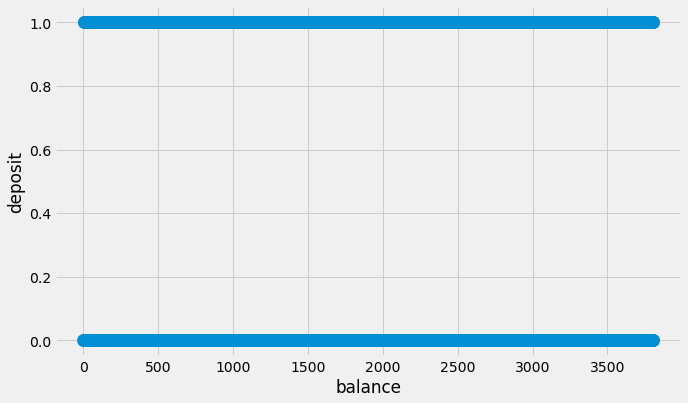

In [9]:
#Plot balance vs deposit
plt.scatter(bank_e.balance, 
bank_e.deposit,
           s=150)
plt.xlabel('balance')
plt.ylabel('deposit')

Text(0, 0.5, 'deposit')

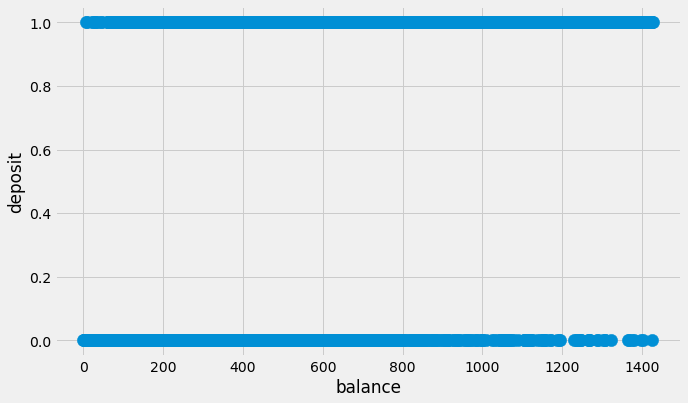

In [10]:
#Plot duration vs deposit
plt.scatter(bank_e.duration, 
bank_e.deposit,
           s=150)
plt.xlabel('balance')
plt.ylabel('deposit')

In [11]:
#7. Build logistic regression model
from sklearn.linear_model import LogisticRegression

In [12]:
#8. Build L2 logistic regression model
model_logistic_l2 = LogisticRegression()

In [13]:
model_logistic_l2.fit(bank_e.iloc[:,:16], bank_e.iloc[:,16])

LogisticRegression()

In [14]:
model_logistic_l2.coef_

array([[-1.09546627e-02,  3.46913344e-02, -5.83323084e-02,
         4.42900861e-03, -5.41499322e-03,  2.20932355e-04,
        -1.85401906e-01, -5.54983177e-02, -2.25158707e-01,
        -1.36078284e-02, -9.08844772e-02,  4.48510836e-03,
        -2.65021679e-01, -4.41957380e-04,  1.58284741e-01,
        -2.01018074e-01]])

In [15]:
#9. Build L1 logistic regression model

model_logistic_l1 = LogisticRegression(penalty="l1")

In [16]:
model_logistic_l1.fit(bank_e.iloc[:,:16], bank_e.iloc[:,16])
model_logistic_l1.coef_

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [17]:
#10. Build L1 logistic regression model with different values of C
model_logistic_l1 = LogisticRegression(penalty="l1", C=0.001)
model_logistic_l1.fit(bank_e.iloc[:,:16], bank_e.iloc[:,16])
model_logistic_l1.coef_

ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

In [18]:
#10. Find generalization error. Use 80/20 split
from sklearn.cross_validation import train_test_split

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [19]:
x_train, x_test, y_train, y_test = train_test_split(bank_e.iloc[:,:16],
bank_e.iloc[:,16],test_size=0.2)

NameError: name 'train_test_split' is not defined

In [20]:
type(train_test_split(bank_e.iloc[:,:16], bank_e.iloc[:,16],test_size=0.2))

NameError: name 'train_test_split' is not defined

In [21]:
bank_e.shape, x_train.shape, y_train.shape, x_test.shape, y_test.shape

NameError: name 'x_train' is not defined

In [22]:
#Using L2 Logistic Regression

model_logistic_l2 = LogisticRegression()
model_logistic_l2.fit(x_train, y_train)
model_logistic_l2.coef_

NameError: name 'x_train' is not defined

In [23]:
#11. report mis-classification rate
l2_predict = model_logistic_l2.predict(x_test)

NameError: name 'x_test' is not defined

In [24]:
model_logistic_l2

LogisticRegression()

In [25]:
report = pd.DataFrame([l2_predict, y_test]).T
report.columns = ["Prediction", "Actual"]
report.head()

NameError: name 'l2_predict' is not defined

In [26]:
report.match = (report.Prediction == report.Actual)

NameError: name 'report' is not defined

In [27]:
misclassification_rate = 100 - report.match.sum()/report.shape[0]*100

NameError: name 'report' is not defined

In [28]:
print(misclassification_rate)

NameError: name 'misclassification_rate' is not defined